<a href="https://colab.research.google.com/github/tonyyoung3/python_stock/blob/main/stock_exploration_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#使用 yfihance 抓取過去五年股價 以及從證交所獲取個股產業別


In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as solver

from functools import reduce



抓取股票代號

In [2]:
link = 'https://quality.data.gov.tw/dq_download_json.php?nid=11549&md5_url=bb878d47ffbe7b83bfc1b41d0b24946e'
r = requests.get(link)
data = pd.DataFrame(r.json())
data

,證券代號,證券名稱,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,0050,元大台灣50,6315479,674047631,106.35,107.05,106.30,106.70,0.6500,7927
1,0051,元大中型100,25690,1026162,39.85,40.00,39.85,39.90,0.2500,30
2,0052,富邦科技,1126837,105810332,94.20,94.30,93.50,93.70,0.2000,250
3,0053,元大電子,10080,515800,50.95,51.30,50.95,51.30,0.6000,11
4,0054,元大台商50,24000,611660,25.45,25.69,25.45,25.69,0.3900,5
...,...,...,...,...,...,...,...,...,...,...
1118,9944,新麗,168000,3738700,22.05,22.45,22.05,22.35,0.0500,100
1119,9945,潤泰新,3801519,153073013,40.40,40.55,40.05,40.05,-0.2000,1863
1120,9946,三發地產,104096,1929791,18.35,19.00,18.35,18.55,0.0000,43
1121,9955,佳龍,191342,3619463,18.90,19.00,18.80,18.85,0.1000,104


In [7]:
url = "https://isin.twse.com.tw/isin/C_public.jsp?strMode=2"
html_text = requests.get(url)
html_text.encoding =  html_text.apparent_encoding
industry_table = pd.read_html(html_text.text)[0]


In [4]:
industry_table

,0,1,2,3,4,5,6
0,有價證券代號及名稱,國際證券辨識號碼(ISIN Code),上市日,市場別,產業別,CFICode,備註
1,股票,股票,股票,股票,股票,股票,股票
2,1101 台泥,TW0001101004,1962/02/09,上市,水泥工業,ESVUFR,NaN
3,1102 亞泥,TW0001102002,1962/06/08,上市,水泥工業,ESVUFR,NaN
4,1103 嘉泥,TW0001103000,1969/11/14,上市,水泥工業,ESVUFR,NaN
...,...,...,...,...,...,...,...
23895,01003T 兆豐新光R1,TW00001003T4,2005/12/26,上市,NaN,CBCIXU,NaN
23896,01004T 土銀富邦R2,TW00001004T2,2006/04/13,上市,NaN,CBCIXU,NaN
23897,01007T 兆豐國泰R2,TW00001007T5,2006/10/13,上市,NaN,CBCIXU,NaN
23898,01009T 王道圓滿R1,TW00001009T1,2018/06/21,上市,NaN,CBCIXU,NaN


In [8]:
industry_table.columns = industry_table.iloc[0]
industry_table = industry_table[2:][industry_table["市場別"] == '上市'][industry_table["產業別"].isnull() == False]
industry_table['code'], industry_table['name'] = industry_table['有價證券代號及名稱'].str.split().str
industry_table = industry_table[industry_table['code'].str.len() == 4]
industry_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  This is separate from the ipykernel package so we can avoid doing imports until


,有價證券代號及名稱,國際證券辨識號碼(ISIN Code),上市日,市場別,產業別,CFICode,備註,code,name
2,1101 台泥,TW0001101004,1962/02/09,上市,水泥工業,ESVUFR,NaN,1101,台泥
3,1102 亞泥,TW0001102002,1962/06/08,上市,水泥工業,ESVUFR,NaN,1102,亞泥
4,1103 嘉泥,TW0001103000,1969/11/14,上市,水泥工業,ESVUFR,NaN,1103,嘉泥
5,1104 環泥,TW0001104008,1971/02/01,上市,水泥工業,ESVUFR,NaN,1104,環泥
6,1108 幸福,TW0001108009,1990/06/06,上市,水泥工業,ESVUFR,NaN,1108,幸福
...,...,...,...,...,...,...,...,...,...
950,9944 新麗,TW0009944009,2002/08/26,上市,其他業,ESVUFR,NaN,9944,新麗
951,9945 潤泰新,TW0009945006,1992/04/30,上市,其他業,ESVUFR,NaN,9945,潤泰新
952,9946 三發地產,TW0009946004,2013/09/17,上市,建材營造業,ESVUFR,NaN,9946,三發地產
953,9955 佳龍,TW0009955005,2008/01/21,上市,其他業,ESVUFR,NaN,9955,佳龍


In [10]:
!pip3 install yfinance

     |████████████████████████████████| 6.3MB 11.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=f5be35be504a0943757e6b73abbeb0cdaabbc85e1d0ec6a6ff865a5b64b31d00
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [11]:
import yfinance as yf


In [13]:
historical_data = pd.DataFrame()

下載台股資料並存到historical_data , period 5y=5年

In [14]:
for i in industry_table['code'] :
  stock = i + '.TW'
  hisdata = yf.Ticker(stock)
  df = hisdata.history(period="5y")
  df['STOCK_ID'] = i
  historical_data = pd.concat([historical_data, df])
  # time.sleep(0.8)


In [15]:
historical_data_f = historical_data[['STOCK_ID','Close']][historical_data['STOCK_ID'].str.len()==4]
historical_data_f

,STOCK_ID,Close
Date,,
2016-06-27,1101,19.664051
2016-06-28,1101,19.882544
2016-06-29,1101,19.664051
2016-06-30,1101,20.007393
2016-07-01,1101,20.381945
...,...,...
2021-06-17,9958,132.500000
2021-06-18,9958,132.500000
2021-06-21,9958,133.500000


In [15]:
industry_table = industry_table[['code','產業別']]

In [13]:
industry_table

,code,產業別
2,1101,水泥工業
3,1102,水泥工業
4,1103,水泥工業
5,1104,水泥工業
6,1108,水泥工業
...,...,...
950,9944,其他業
951,9945,其他業
952,9946,建材營造業
953,9955,其他業


留下股票代號跟收盤價

In [42]:
df_pivot = pd.pivot(historical_data_f.reset_index(), index="Date", columns="STOCK_ID", values="Close")
df_pivot

STOCK_ID,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,1225,1227,1229,1231,1232,1233,1234,1235,1236,1256,1301,1303,1304,1305,1307,1308,1309,1310,1312,1313,1314,1315,1316,...,8940,8996,9802,9902,9904,9905,9906,9907,9908,9910,9911,9912,9914,9917,9918,9919,9921,9924,9925,9926,9927,9928,9929,9930,9931,9933,9934,9935,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-27,19.664051,22.338121,6.875246,15.956441,8.608870,9.183702,14.718298,19.786318,17.632242,21.488758,17.272726,29.937551,51.468159,7.990147,11.534911,14.072782,9.123828,35.286976,57.961086,10.985521,20.290939,61.903595,29.509594,25.186186,13.059258,17.746748,80.176384,59.229660,45.816772,10.169719,9.700457,29.379473,12.642353,6.568779,10.345060,13.218220,6.342951,6.318420,26.200279,11.364096,...,14.70,50.167347,44.679092,8.372941,33.488293,19.866859,19.947399,12.560761,19.080172,74.679794,25.063082,7.80,115.501091,72.872711,26.268064,9.587945,176.493256,35.639679,30.759974,32.656174,21.881676,9.95523,12.467340,41.521835,24.788147,35.434120,10.029390,10.250445,29.108875,70.595718,37.891838,18.758829,47.779678,61.904060,36.864334,19.423166,30.109146,8.801376,13.40,9.013937
2016-06-28,19.882544,21.979116,6.941835,15.845119,8.566463,9.183702,14.718298,19.786318,17.713682,21.452765,17.454544,29.780809,50.411152,7.960591,11.668007,14.072782,9.123828,35.153316,58.035385,10.933209,20.487942,61.903595,29.235992,24.953699,13.173063,17.836151,80.558174,59.074200,45.740540,10.128711,9.766223,29.613573,12.642353,6.532134,10.379430,13.174452,6.357222,6.300870,26.361677,11.519769,...,15.00,50.167347,46.432697,8.418645,33.206543,19.828508,21.921200,12.560761,19.080172,75.263229,24.883417,7.80,112.825386,72.630081,26.268064,9.634042,173.845856,36.453880,30.798174,32.656174,21.772810,9.95523,12.467340,41.521835,25.340708,35.281548,10.029390,10.152822,29.108875,70.595718,37.891838,18.537783,47.844654,62.057293,36.864334,19.049644,30.640921,8.768160,13.55,9.004879
2016-06-29,19.664051,22.218452,6.925187,15.882225,8.608870,9.183702,14.670198,19.419905,17.591522,21.884699,17.454544,29.702436,51.549465,8.019704,11.712372,14.026791,9.282504,35.153316,58.481247,10.985521,20.553608,62.371368,29.392336,25.224934,13.286870,17.746748,80.939972,59.773769,46.502884,10.251733,10.259467,29.691601,12.791087,6.605425,10.620011,13.480833,6.442840,6.335972,26.415476,11.623549,...,15.45,51.614479,45.975193,8.500912,34.132301,19.905216,19.737499,12.560761,19.450260,74.679794,24.883417,7.82,115.501091,74.571182,27.393841,9.726233,176.934494,37.749191,30.798174,34.297005,21.772810,9.95523,12.581674,41.882942,25.301231,35.853683,10.136848,10.201633,29.108875,71.950073,38.090641,18.537783,48.039722,62.057293,37.484486,18.862885,30.518181,8.934244,13.50,8.986765
2016-06-30,20.007393,22.258343,6.950159,16.253304,8.566463,9.138012,14.622098,19.328302,17.672964,21.200804,17.318180,29.114660,51.630775,8.039408,11.712372,13.980802,9.361842,35.643414,58.629868,11.011677,20.652107,62.449329,29.548677,25.302431,13.343774,17.880854,82.848930,60.473335,46.502884,10.251733,10.226583,29.613573,12.716720,6.678717,10.791858,13.612141,6.464244,6.344748,26.469276,11.623549,...,15.55,51.373295,46.890133,8.555756,34.655556,19.866859,19.317499,12.648909,19.738108,77.596947,24.838501,7.83,120.852486,75.218231,27.518925,9.772330,176.493256,38.045269,30.912800,34.297005,21.881676,9.30814,12.124204,41.810738,25.538080,35.853683,10.280126,10.201633,29.228010,72.796539,38.130402,18.348261,48.039722,61.750832,37.277771,18.956264,30.640921,8.967462,13.35,8.986765
2016-07-01,20.381945,22.737015,6.966805,16.327520,8.651278,9.183702,14.574000,19.282499,17.591522,21.524755,17.318180,30.368589,52.769093,8.029556,11.712372,14.072782,9.441178,35.687965,59.075722,11.090145,20.586441,63.540829,29.822275,25.496172,13.258419,17.880854,82.848930,61.250614,46.579113,10.333748,10.193702,29.340450,12.791087,6.71536

In [44]:
df_pivot.fillna(method = 'ffill',inplace=True) #use prev price if missing

STOCK_ID         1101       1102       1103  ...       9946   9955        9958
Date                                         ...                              
2016-06-27  19.664051  22.338121   6.875246  ...   8.801376  13.40    9.013937
2016-06-28  19.882544  21.979116   6.941835  ...   8.768160  13.55    9.004879
2016-06-29  19.664051  22.218452   6.925187  ...   8.934244  13.50    8.986765
2016-06-30  20.007393  22.258343   6.950159  ...   8.967462  13.35    8.986765
2016-07-01  20.381945  22.737015   6.966805  ...   8.867810  13.65    8.995822
...               ...        ...        ...  ...        ...    ...         ...
2021-06-21  50.700001  50.000000  21.650000  ...  14.550000  18.50  133.500000
2021-06-22  50.900002  50.799999  21.900000  ...  14.600000  18.75  137.500000
2021-06-23  51.000000  50.500000  22.049999  ...        NaN    NaN         NaN
2021-06-24  51.099998  50.299999  22.250000  ...        NaN    NaN         NaN
2021-06-25  51.000000  50.599998  22.350000  ...  15

In [49]:
df_pivot.columns[df_pivot.isna().any()]
# df_pivot[df_pivot.isna().any(axis=1)]

Index(['1341', '1342', '2025', '2211', '2243', '2247', '2250', '2630', '2936',
       '2939', '3092', '3712', '3714', '4148', '4439', '4552', '4560', '4564',
       '4566', '4571', '4572', '4576', '4581', '4764', '4766', '4807', '5546',
       '6426', '6515', '6573', '6581', '6582', '6591', '6592', '6598', '6625',
       '6641', '6655', '6666', '6668', '6669', '6670', '6671', '6672', '6674',
       '6698', '6706', '6715', '6743', '6754', '6756', '6768', '6776', '6781',
       '8104', '8367', '8442', '8466', '8480', '8482', '8488', '8499'],
      dtype='object', name='STOCK_ID')

In [50]:
df_pivot[df_pivot.columns[df_pivot.isna().any()]]

STOCK_ID,1341,1342,2025,2211,2243,2247,2250,2630,2936,2939,3092,3712,3714,4148,4439,4552,4560,4564,4566,4571,4572,4576,4581,4764,4766,4807,5546,6426,6515,6573,6581,6582,6591,6592,6598,6625,6641,6655,6666,6668,6669,6670,6671,6672,6674,6698,6706,6715,6743,6754,6756,6768,6776,6781,8104,8367,8442,8466,8480,8482,8488,8499
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.305565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.023857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-21,79.500000,55.200001,2.05,60.900002,11.50,225.5,215.0,24.799999,22.799999,34.599998,NaN,28.000000,79.699997,34.000000,152.5,30.049999,42.650002,45.400002,44.349998,126.5,108.5,113.0,36.450001,60.500000,155.5,27.299999,75.300003,NaN,276.0,19.049999,69.900002,286.000000,69.800003,83.800003,48.599998,27.000000,67.800003,72.400002,74.699997,69.400002,978.0,208.0,49.700001,143.0,28.400000,39.549999,174.0,115.5,NaN,47.150002,358.0,71.599998,44.000000,804.0,49.599998,47.900002,39.299999,58.000000,111.5,77.699997,16.100000,140.0
2021-06-22,79.000000,55.700001,2.05,66.900002,11.95,225.0,212.0,27.250000,22.850000,34.599998,NaN,27.950001,79.400002,34.349998,153.0,29.900000,42.549999,44.599998,44.500000,128.5,110.5,112.5,36.049999,61.799999,155.0,26.049999,76.000000,NaN,271.5,18.700001,70.500000,290.000000,66.000000,84.699997,47.299999,27.049999,68.000000,72.199997,75.599998,69.199997,956.0,208.0,49.700001,139.5,28.299999,39.549999,172.5,115.0,NaN,47.450001,371.0,71.599998,44.000000,884.0,49.299999,48.200001,39.349998,57.700001,112.5,78.599998,16.200001,139.0
2021-06-23,80.099998,54.799999,2.05,69.800003,11.80,226.5,204.0,27.250000,22.850000,34.599998,NaN,27.950001,79.400002,34.349998,153.0,29.900000,42.549999,44.599998,44.500000,128.5,110.5,112.5,36.049999,61.799999,155.0,26.049999,76.000000,NaN,271.5,18.700001,70.500000,290.000000,66.000000,84.699997,47.299999,27.049999,68.000000,72.199997,75.599998,69.199997,956.0,208.0,49.700001,139.5,28.299999,39.549999,172.5,115.0,NaN,47.450001,371.0,71.599998,44.000000,884.0,49.299999,48.200001,39.349998,57.700001,112.5,78.599998,16.200001,139.0


In [32]:
df_pivot

STOCK_ID,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,1225,1227,1229,1231,1232,1233,1234,1235,1236,1256,1301,1303,1304,1305,1307,1308,1309,1310,1312,1313,1314,1315,1316,...,8940,8996,9802,9902,9904,9905,9906,9907,9908,9910,9911,9912,9914,9917,9918,9919,9921,9924,9925,9926,9927,9928,9929,9930,9931,9933,9934,9935,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-27,19.664051,22.338121,6.875246,15.956441,8.608870,9.183702,14.718298,19.786318,17.632242,21.488758,17.272726,29.937551,51.468159,7.990147,11.534911,14.072782,9.123828,35.286976,57.961086,10.985521,20.290939,61.903595,29.509594,25.186186,13.059258,17.746748,80.176384,59.229660,45.816772,10.169719,9.700457,29.379473,12.642353,6.568779,10.345060,13.218220,6.342951,6.318420,26.200279,11.364096,...,14.70,50.167347,44.679092,8.372941,33.488293,19.866859,19.947399,12.560761,19.080172,74.679794,25.063082,7.80,115.501091,72.872711,26.268064,9.587945,176.493256,35.639679,30.759974,32.656174,21.881676,9.95523,12.467340,41.521835,24.788147,35.434120,10.029390,10.250445,29.108875,70.595718,37.891838,18.758829,47.779678,61.904060,36.864334,19.423166,30.109146,8.801376,13.40,9.013937
2016-06-28,19.882544,21.979116,6.941835,15.845119,8.566463,9.183702,14.718298,19.786318,17.713682,21.452765,17.454544,29.780809,50.411152,7.960591,11.668007,14.072782,9.123828,35.153316,58.035385,10.933209,20.487942,61.903595,29.235992,24.953699,13.173063,17.836151,80.558174,59.074200,45.740540,10.128711,9.766223,29.613573,12.642353,6.532134,10.379430,13.174452,6.357222,6.300870,26.361677,11.519769,...,15.00,50.167347,46.432697,8.418645,33.206543,19.828508,21.921200,12.560761,19.080172,75.263229,24.883417,7.80,112.825386,72.630081,26.268064,9.634042,173.845856,36.453880,30.798174,32.656174,21.772810,9.95523,12.467340,41.521835,25.340708,35.281548,10.029390,10.152822,29.108875,70.595718,37.891838,18.537783,47.844654,62.057293,36.864334,19.049644,30.640921,8.768160,13.55,9.004879
2016-06-29,19.664051,22.218452,6.925187,15.882225,8.608870,9.183702,14.670198,19.419905,17.591522,21.884699,17.454544,29.702436,51.549465,8.019704,11.712372,14.026791,9.282504,35.153316,58.481247,10.985521,20.553608,62.371368,29.392336,25.224934,13.286870,17.746748,80.939972,59.773769,46.502884,10.251733,10.259467,29.691601,12.791087,6.605425,10.620011,13.480833,6.442840,6.335972,26.415476,11.623549,...,15.45,51.614479,45.975193,8.500912,34.132301,19.905216,19.737499,12.560761,19.450260,74.679794,24.883417,7.82,115.501091,74.571182,27.393841,9.726233,176.934494,37.749191,30.798174,34.297005,21.772810,9.95523,12.581674,41.882942,25.301231,35.853683,10.136848,10.201633,29.108875,71.950073,38.090641,18.537783,48.039722,62.057293,37.484486,18.862885,30.518181,8.934244,13.50,8.986765
2016-06-30,20.007393,22.258343,6.950159,16.253304,8.566463,9.138012,14.622098,19.328302,17.672964,21.200804,17.318180,29.114660,51.630775,8.039408,11.712372,13.980802,9.361842,35.643414,58.629868,11.011677,20.652107,62.449329,29.548677,25.302431,13.343774,17.880854,82.848930,60.473335,46.502884,10.251733,10.226583,29.613573,12.716720,6.678717,10.791858,13.612141,6.464244,6.344748,26.469276,11.623549,...,15.55,51.373295,46.890133,8.555756,34.655556,19.866859,19.317499,12.648909,19.738108,77.596947,24.838501,7.83,120.852486,75.218231,27.518925,9.772330,176.493256,38.045269,30.912800,34.297005,21.881676,9.30814,12.124204,41.810738,25.538080,35.853683,10.280126,10.201633,29.228010,72.796539,38.130402,18.348261,48.039722,61.750832,37.277771,18.956264,30.640921,8.967462,13.35,8.986765
2016-07-01,20.381945,22.737015,6.966805,16.327520,8.651278,9.183702,14.574000,19.282499,17.591522,21.524755,17.318180,30.368589,52.769093,8.029556,11.712372,14.072782,9.441178,35.687965,59.075722,11.090145,20.586441,63.540829,29.822275,25.496172,13.258419,17.880854,82.848930,61.250614,46.579113,10.333748,10.193702,29.340450,12.791087,6.71536

In [51]:
df_pivot = df_pivot[ df_pivot.columns[~df_pivot.isnull().any()]]
print(df_pivot[df_pivot.isnull().T.any()])

Empty DataFrame
Columns: [1101, 1102, 1103, 1104, 1108, 1109, 1110, 1201, 1203, 1210, 1213, 1215, 1216, 1217, 1218, 1219, 1220, 1225, 1227, 1229, 1231, 1232, 1233, 1234, 1235, 1236, 1256, 1301, 1303, 1304, 1305, 1307, 1308, 1309, 1310, 1312, 1313, 1314, 1315, 1316, 1319, 1321, 1323, 1324, 1325, 1326, 1337, 1338, 1339, 1340, 1402, 1409, 1410, 1413, 1414, 1416, 1417, 1418, 1419, 1423, 1432, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1449, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1459, 1460, 1463, 1464, 1465, 1466, 1467, 1468, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1503, ...]
Index: []

[0 rows x 891 columns]


In [52]:
df_pivot 

STOCK_ID,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,1225,1227,1229,1231,1232,1233,1234,1235,1236,1256,1301,1303,1304,1305,1307,1308,1309,1310,1312,1313,1314,1315,1316,...,8940,8996,9802,9902,9904,9905,9906,9907,9908,9910,9911,9912,9914,9917,9918,9919,9921,9924,9925,9926,9927,9928,9929,9930,9931,9933,9934,9935,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-27,19.664051,22.338121,6.875246,15.956441,8.608870,9.183702,14.718298,19.786318,17.632242,21.488758,17.272726,29.937551,51.468159,7.990147,11.534911,14.072782,9.123828,35.286976,57.961086,10.985521,20.290939,61.903595,29.509594,25.186186,13.059258,17.746748,80.176384,59.229660,45.816772,10.169719,9.700457,29.379473,12.642353,6.568779,10.345060,13.218220,6.342951,6.318420,26.200279,11.364096,...,14.70,50.167347,44.679092,8.372941,33.488293,19.866859,19.947399,12.560761,19.080172,74.679794,25.063082,7.80,115.501091,72.872711,26.268064,9.587945,176.493256,35.639679,30.759974,32.656174,21.881676,9.95523,12.467340,41.521835,24.788147,35.434120,10.029390,10.250445,29.108875,70.595718,37.891838,18.758829,47.779678,61.904060,36.864334,19.423166,30.109146,8.801376,13.40,9.013937
2016-06-28,19.882544,21.979116,6.941835,15.845119,8.566463,9.183702,14.718298,19.786318,17.713682,21.452765,17.454544,29.780809,50.411152,7.960591,11.668007,14.072782,9.123828,35.153316,58.035385,10.933209,20.487942,61.903595,29.235992,24.953699,13.173063,17.836151,80.558174,59.074200,45.740540,10.128711,9.766223,29.613573,12.642353,6.532134,10.379430,13.174452,6.357222,6.300870,26.361677,11.519769,...,15.00,50.167347,46.432697,8.418645,33.206543,19.828508,21.921200,12.560761,19.080172,75.263229,24.883417,7.80,112.825386,72.630081,26.268064,9.634042,173.845856,36.453880,30.798174,32.656174,21.772810,9.95523,12.467340,41.521835,25.340708,35.281548,10.029390,10.152822,29.108875,70.595718,37.891838,18.537783,47.844654,62.057293,36.864334,19.049644,30.640921,8.768160,13.55,9.004879
2016-06-29,19.664051,22.218452,6.925187,15.882225,8.608870,9.183702,14.670198,19.419905,17.591522,21.884699,17.454544,29.702436,51.549465,8.019704,11.712372,14.026791,9.282504,35.153316,58.481247,10.985521,20.553608,62.371368,29.392336,25.224934,13.286870,17.746748,80.939972,59.773769,46.502884,10.251733,10.259467,29.691601,12.791087,6.605425,10.620011,13.480833,6.442840,6.335972,26.415476,11.623549,...,15.45,51.614479,45.975193,8.500912,34.132301,19.905216,19.737499,12.560761,19.450260,74.679794,24.883417,7.82,115.501091,74.571182,27.393841,9.726233,176.934494,37.749191,30.798174,34.297005,21.772810,9.95523,12.581674,41.882942,25.301231,35.853683,10.136848,10.201633,29.108875,71.950073,38.090641,18.537783,48.039722,62.057293,37.484486,18.862885,30.518181,8.934244,13.50,8.986765
2016-06-30,20.007393,22.258343,6.950159,16.253304,8.566463,9.138012,14.622098,19.328302,17.672964,21.200804,17.318180,29.114660,51.630775,8.039408,11.712372,13.980802,9.361842,35.643414,58.629868,11.011677,20.652107,62.449329,29.548677,25.302431,13.343774,17.880854,82.848930,60.473335,46.502884,10.251733,10.226583,29.613573,12.716720,6.678717,10.791858,13.612141,6.464244,6.344748,26.469276,11.623549,...,15.55,51.373295,46.890133,8.555756,34.655556,19.866859,19.317499,12.648909,19.738108,77.596947,24.838501,7.83,120.852486,75.218231,27.518925,9.772330,176.493256,38.045269,30.912800,34.297005,21.881676,9.30814,12.124204,41.810738,25.538080,35.853683,10.280126,10.201633,29.228010,72.796539,38.130402,18.348261,48.039722,61.750832,37.277771,18.956264,30.640921,8.967462,13.35,8.986765
2016-07-01,20.381945,22.737015,6.966805,16.327520,8.651278,9.183702,14.574000,19.282499,17.591522,21.524755,17.318180,30.368589,52.769093,8.029556,11.712372,14.072782,9.441178,35.687965,59.075722,11.090145,20.586441,63.540829,29.822275,25.496172,13.258419,17.880854,82.848930,61.250614,46.579113,10.333748,10.193702,29.340450,12.791087,6.71536

資料包含0050等etf,再次過濾留下純股票

In [53]:
df_pivot.index.name = None
df_pivot = df_pivot.rename_axis(columns=None)


In [47]:
df_pivot.index.strftime('%Y-%m')

Index(['2016-07', '2016-07', '2016-07', '2016-07', '2016-07', '2016-07',
       '2016-07', '2016-07', '2016-07', '2016-07',
       ...
       '2020-12', '2020-12', '2020-12', '2020-12', '2020-12', '2020-12',
       '2020-12', '2020-12', '2020-12', '2020-12'],
      dtype='object', length=1107)

In [55]:
df_period = df_pivot.groupby(df_pivot.index.strftime('%Y-%m')).tail(1)
returns_m = df_period.pct_change()
returns_m = returns_m[1:]
returns_m

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,1225,1227,1229,1231,1232,1233,1234,1235,1236,1256,1301,1303,1304,1305,1307,1308,1309,1310,1312,1313,1314,1315,1316,...,8940,8996,9802,9902,9904,9905,9906,9907,9908,9910,9911,9912,9914,9917,9918,9919,9921,9924,9925,9926,9927,9928,9929,9930,9931,9933,9934,9935,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958
2016-07-29,0.099690,0.046595,0.068263,0.036313,0.011373,0.035505,0.019780,-0.049763,0.004608,-0.081494,-0.009711,0.046583,0.026771,0.000000,0.022727,0.023135,-0.070267,0.280000,0.005070,0.011877,0.012719,0.051557,0.033793,0.046225,-0.019190,0.020450,-0.023923,0.046753,0.043381,0.072312,0.057878,0.067950,0.052632,0.035665,0.076433,0.137815,0.006623,0.048409,0.032155,-0.017857,...,-0.054662,-0.070423,0.106952,0.029380,0.047376,0.027027,-0.060867,0.015284,0.015218,0.245940,0.189873,0.015326,0.088561,0.051332,-0.008859,0.019003,0.075000,-0.046925,0.082511,-0.029173,0.034826,-0.087344,0.047168,0.036161,-0.004636,0.006724,0.056353,-0.009569,0.020968,0.139535,0.007332,-0.017210,0.023877,0.105537,-0.000586,-0.029557,0.020028,0.000000,0.258427,0.010164
2016-08-31,0.069322,0.012859,0.020370,0.128205,-0.006397,0.054187,0.003268,-0.037406,0.027523,0.017919,-0.072886,0.048649,-0.055742,-0.018382,0.125926,0.000000,0.052381,-0.009567,0.108133,0.063360,0.007561,0.016435,-0.001349,0.006125,0.065217,-0.017767,0.549020,0.003856,0.004967,0.062016,0.289488,-0.034483,0.041978,0.011921,0.021823,-0.056548,0.071855,-0.025066,0.000000,0.000000,...,0.000000,-0.015587,-0.053436,0.018028,0.057471,-0.049801,-0.124999,-0.007018,0.014989,0.059024,0.088127,0.051572,-0.091668,-0.036286,-0.001587,0.000000,-0.015805,-0.066810,-0.038368,0.032973,0.036859,-0.033203,-0.022524,-0.053096,-0.009616,-0.001111,0.139785,-0.034783,0.004149,-0.040569,0.009709,-0.010510,0.004225,-0.003529,-0.008982,0.221554,-0.030104,-0.007999,0.107143,0.031186
2016-09-30,-0.012414,-0.035088,0.003333,0.018595,-0.008584,-0.042056,0.000000,-0.077720,0.023365,0.013035,-0.056604,-0.027062,-0.011725,-0.004007,0.059211,0.000000,-0.018100,0.048290,0.037275,0.002392,-0.016778,0.046020,0.006757,-0.018265,0.138776,-0.005168,-0.069620,0.001280,0.023064,0.036496,0.053300,-0.002747,0.002809,0.018325,-0.015385,0.000000,0.093096,0.041949,0.014403,-0.009091,...,0.047619,0.043860,-0.029033,-0.027083,-0.038044,-0.027254,-0.095237,-0.017668,0.004219,-0.088522,-0.043415,-0.041866,0.158915,0.012182,0.011129,0.052381,0.080292,-0.025404,0.001247,0.031056,0.041927,0.109091,0.050693,0.037381,0.025892,0.023359,0.025157,-0.003003,0.006887,0.217391,0.044872,0.005313,0.000000,0.007084,-0.011078,0.033755,0.035088,-0.064517,-0.059140,-0.002017
2016-10-31,0.057263,0.001818,-0.012182,-0.004057,-0.017316,-0.024390,-0.016287,0.005618,0.004566,0.056985,0.060000,0.190729,0.035593,-0.041985,0.046584,0.009804,-0.036866,-0.001919,-0.032218,0.021480,0.006826,0.005945,-0.006711,0.001550,0.073477,-0.031169,-0.081633,0.092072,0.057971,0.084507,0.219277,-0.039945,0.025210,0.043702,0.043750,0.113565,0.062201,0.172727,0.018256,-0.009174,...,-0.029221,-0.042017,0.034884,-0.027837,-0.035028,0.000000,-0.017546,-0.025180,-0.002101,-0.050359,-0.120121,-0.061174,-0.026756,-0.009847,0.004717,-0.040724,0.006757,-0.055687,-0.007474,-0.002410,-0.026814,-0.049181,0.026316,-0.032431,0.000000,0.007609,-0.046012,0.004016,0.000000,-0.040179,0.057260,0.017604,0.018233,-0.032825,0.004073,-0.085714,-0.050849,-0.004310,-0.065714,0.030300
2016-11-30,-0.026420,0.018149,-0.003363,0.008147,0.020925,-0.005000,0.000000,0.008380,0.020455,0.024348,0.050315,0.021135,-0.108020,-0.030544,-0.059347,0.006473,0.043062,-0.142308,-0.032010,0.028037,0.050847,-0.007092,-0.010811,0.003096,-0.025042,-0.016086,-0.077778,0.063232,0.021309,0.029221,0.081028,0.017217,0.016393,0.086207,0.257485,0.201133,0.117117,0.044297,-0.001992,-0.023148,...,-0.010033,-0.007018,-0.049758,-0.006608,-0.066745,-0.019397,0.255950,0.007380,0.014737,-0.094697,-0.005502,-0.042553,-0.041237,-0.038674,-0.

計算各產業報酬率

In [59]:
for i in industry_table['code']:  
  industry = industry_table['產業別'][industry_table['code']== i].values[0]
  if industry not in  returns_m.columns:
    if i in returns_m.columns:
      returns_m[industry] = returns_m.loc[:,i]
      print(returns_m[industry].iloc[0] )
  else :
    if i in returns_m.columns:
      returns_m[industry] = returns_m[industry] + returns_m.loc[:,i]

0.09969039917114375
-0.04976308017774933
0.04675310650120523
-0.017857144322263152
0.2309655290323267
0.08118409407241911
0.07158101460422617
-0.02739724588039294
-0.027538700342149114
-0.002484449948286782
0.10905469139001278
0.011627634825972288
0.031262160815488826
-0.018181866304590955
0.010852665864220068
0.07862628750691347
0.01801797159711005
-0.0016772535428648538
0.08390024773886684
0.07638881386441243
-0.012396653919454326
0.13775506320467512
0.04255331055298872
0.08489189527204899
0.2323758158288367
0.01596248941222478
0.006989204752466449
0.0238835573277687


In [60]:
for i in industry_table['產業別'].drop_duplicates():
  n = industry_table.groupby('產業別').size()[i]
  if i in returns_m.columns :
    returns_m[i] = returns_m[i]/n

In [61]:
returns_m

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,1213,1215,1216,1217,1218,1219,1220,1225,1227,1229,1231,1232,1233,1234,1235,1236,1256,1301,1303,1304,1305,1307,1308,1309,1310,1312,1313,1314,1315,1316,...,9937,9938,9939,9940,9941,9942,9943,9944,9945,9946,9955,9958,水泥工業,食品工業,塑膠工業,建材營造業,汽車工業,紡織纖維,其他業,貿易百貨業,電子零組件業,電機機械,生技醫療業,電器電纜,化學工業,玻璃陶瓷,造紙工業,鋼鐵工業,橡膠工業,航運業,電腦及週邊設備業,半導體業,其他電子業,通信網路業,光電業,電子通路業,資訊服務業,油電燃氣業,觀光事業,金融保險業
2016-07-29,0.099690,0.046595,0.068263,0.036313,0.011373,0.035505,0.019780,-0.049763,0.004608,-0.081494,-0.009711,0.046583,0.026771,0.000000,0.022727,0.023135,-0.070267,0.280000,0.005070,0.011877,0.012719,0.051557,0.033793,0.046225,-0.019190,0.020450,-0.023923,0.046753,0.043381,0.072312,0.057878,0.067950,0.052632,0.035665,0.076433,0.137815,0.006623,0.048409,0.032155,-0.017857,...,0.020968,0.139535,0.007332,-0.017210,0.023877,0.105537,-0.000586,-0.029557,0.020028,0.000000,0.258427,0.010164,0.045360,0.017157,0.038448,-0.001751,0.053517,0.059246,0.037329,0.031639,0.052597,0.015352,0.013618,0.070296,0.021979,0.033852,0.033015,0.045199,0.019497,0.017389,0.060645,0.055799,0.024468,0.044523,0.073757,0.040902,0.047754,0.014782,0.032947,0.047257
2016-08-31,0.069322,0.012859,0.020370,0.128205,-0.006397,0.054187,0.003268,-0.037406,0.027523,0.017919,-0.072886,0.048649,-0.055742,-0.018382,0.125926,0.000000,0.052381,-0.009567,0.108133,0.063360,0.007561,0.016435,-0.001349,0.006125,0.065217,-0.017767,0.549020,0.003856,0.004967,0.062016,0.289488,-0.034483,0.041978,0.011921,0.021823,-0.056548,0.071855,-0.025066,0.000000,0.000000,...,0.004149,-0.040569,0.009709,-0.010510,0.004225,-0.003529,-0.008982,0.221554,-0.030104,-0.007999,0.107143,0.031186,0.040259,0.040201,0.027907,0.012257,0.070461,-0.010058,0.006157,-0.011171,0.042034,0.022355,-0.020536,0.048204,0.017958,0.029203,0.010710,0.030115,0.019373,-0.015626,0.025924,0.016096,0.038314,0.044150,0.060930,0.034488,-0.002910,0.008022,0.005928,0.025172
2016-09-30,-0.012414,-0.035088,0.003333,0.018595,-0.008584,-0.042056,0.000000,-0.077720,0.023365,0.013035,-0.056604,-0.027062,-0.011725,-0.004007,0.059211,0.000000,-0.018100,0.048290,0.037275,0.002392,-0.016778,0.046020,0.006757,-0.018265,0.138776,-0.005168,-0.069620,0.001280,0.023064,0.036496,0.053300,-0.002747,0.002809,0.018325,-0.015385,0.000000,0.093096,0.041949,0.014403,-0.009091,...,0.006887,0.217391,0.044872,0.005313,0.000000,0.007084,-0.011078,0.033755,0.035088,-0.064517,-0.059140,-0.002017,-0.010888,0.003018,0.007051,-0.003924,0.010851,0.008000,0.017611,-0.007857,0.020682,0.026070,0.017094,0.061091,-0.003484,0.039862,-0.002050,0.006976,-0.016703,0.015196,0.010323,0.009615,0.009412,-0.016089,-0.004419,0.009023,0.011945,0.013441,-0.000342,-0.003524
2016-10-31,0.057263,0.001818,-0.012182,-0.004057,-0.017316,-0.024390,-0.016287,0.005618,0.004566,0.056985,0.060000,0.190729,0.035593,-0.041985,0.046584,0.009804,-0.036866,-0.001919,-0.032218,0.021480,0.006826,0.005945,-0.006711,0.001550,0.073477,-0.031169,-0.081633,0.092072,0.057971,0.084507,0.219277,-0.039945,0.025210,0.043702,0.043750,0.113565,0.062201,0.172727,0.018256,-0.009174,...,0.000000,-0.040179,0.057260,0.017604,0.018233,-0.032825,0.004073,-0.085714,-0.050849,-0.004310,-0.065714,0.030300,-0.002164,0.012062,0.048233,-0.013525,-0.043778,-0.041177,-0.018511,-0.026035,-0.007096,-0.052260,-0.056882,0.014540,-0.010952,-0.032478,0.059176,0.023908,-0.008129,-0.026268,-0.027685,-0.013848,-0.008811,-0.049504,-0.017559,-0.006193,-0.010478,0.014748,-0.026256,-0.008795
2016-11-30,-0.026420,0.018149,-0.003363,0.008147,0.020925,-0.005000,0.000000,0.008380,0.020455,0.024348,0.050315,0.021135,-0.108020,-0.030544,-0.059347,0.006473,0.043062,-0.142308,-0.032010,0.028037,0.050847,-0.007092,-0.010811,0.003096,-0.025042,-0.016086,-0.077778,0.063232,0.021309,0.029221,0.081028,0.017217,0.016393,0.086207,0.257485,0.201133,0.117117,0.044297,-0.001992,-0.023148,...,0.030096,-0.098605,0.052224,0.105538,0.056473,-0.006061,0.008114,-0.017857,0.046704,0.030302,-0.015291,-0.047056,0.001777,-0.013838,0.042861,0.0438

留下計算後的產業報酬

In [63]:
return_industry = returns_m.iloc[:,891:]
return_industry

,水泥工業,食品工業,塑膠工業,建材營造業,汽車工業,紡織纖維,其他業,貿易百貨業,電子零組件業,電機機械,生技醫療業,電器電纜,化學工業,玻璃陶瓷,造紙工業,鋼鐵工業,橡膠工業,航運業,電腦及週邊設備業,半導體業,其他電子業,通信網路業,光電業,電子通路業,資訊服務業,油電燃氣業,觀光事業,金融保險業
2016-07-29,0.045360,0.017157,0.038448,-0.001751,0.053517,0.059246,0.037329,0.031639,0.052597,0.015352,0.013618,0.070296,0.021979,0.033852,0.033015,0.045199,0.019497,0.017389,0.060645,0.055799,0.024468,0.044523,0.073757,0.040902,0.047754,0.014782,0.032947,0.047257
2016-08-31,0.040259,0.040201,0.027907,0.012257,0.070461,-0.010058,0.006157,-0.011171,0.042034,0.022355,-0.020536,0.048204,0.017958,0.029203,0.010710,0.030115,0.019373,-0.015626,0.025924,0.016096,0.038314,0.044150,0.060930,0.034488,-0.002910,0.008022,0.005928,0.025172
2016-09-30,-0.010888,0.003018,0.007051,-0.003924,0.010851,0.008000,0.017611,-0.007857,0.020682,0.026070,0.017094,0.061091,-0.003484,0.039862,-0.002050,0.006976,-0.016703,0.015196,0.010323,0.009615,0.009412,-0.016089,-0.004419,0.009023,0.011945,0.013441,-0.000342,-0.003524
2016-10-31,-0.002164,0.012062,0.048233,-0.013525,-0.043778,-0.041177,-0.018511,-0.026035,-0.007096,-0.052260,-0.056882,0.014540,-0.010952,-0.032478,0.059176,0.023908,-0.008129,-0.026268,-0.027685,-0.013848,-0.008811,-0.049504,-0.017559,-0.006193,-0.010478,0.014748,-0.026256,-0.008795
2016-11-30,0.001777,-0.013838,0.042861,0.043854,-0.023549,0.013168,-0.009493,0.012162,-0.028944,-0.023022,-0.013505,0.033263,0.005864,0.011380,0.037561,0.085924,-0.000693,0.043355,-0.033966,-0.001322,-0.002222,-0.000948,-0.004083,-0.008337,0.040542,0.013462,-0.026321,0.066462
2016-12-30,-0.011476,-0.002330,0.001655,-0.020011,0.037122,-0.006372,0.001358,-0.001859,0.028112,0.045144,0.013458,-0.002679,0.016123,0.009823,0.036368,-0.014741,0.016133,-0.036566,0.017973,0.014983,0.030456,0.030129,0.042967,0.007526,0.018271,0.016081,-0.007286,0.006307
2017-01-24,0.017743,0.012741,0.026275,0.025580,0.042590,0.025392,0.011014,-0.000029,0.038562,0.038181,-0.010792,0.031842,0.022602,0.009615,0.243962,0.032147,0.040414,0.046815,0.043688,0.030696,0.008481,0.032560,0.029614,0.003336,0.029480,-0.007147,0.011737,-0.001280
2017-02-24,0.089925,0.024110,0.028287,0.069333,0.051737,0.039958,0.044172,0.042353,0.070063,0.038159,0.047204,0.113411,0.041488,0.114628,0.091737,0.091296,0.029125,0.088140,0.029965,0.098723,0.064487,0.054084,0.082601,0.035456,0.022740,0.010241,0.032439,0.031921
2017-03-31,-0.010248,0.012700,-0.016627,0.043358,0.020199,0.002702,0.015614,-0.024950,0.023405,0.025261,-0.023491,-0.012394,-0.004935,-0.010723,-0.041511,-0.006273,-0.021109,-0.027363,0.000443,0.051481,0.040872,0.028010,0.021659,0.007087,0.043822,0.014576,0.003026,0.009204
2017-04-28,-0.022048,-0.001133,-0.031236,-0.017428,-0.007194,0.000194,0.006424,-0.006933,0.021922,-0.023970,-0.020817,-0.037680,-0.011263,-0.052487,-0.053511,-0.046508,-0.023528,-0.041125,-0.021831,0.001008,0.022956,-0.009989,0.004752,-0.014310,-0.028760,0.001047,-0.000764,-0.014155


In [65]:
return_stock = returns_m.iloc[:,:892]

y = np.array(return_stock.mean()*12 ).tolist()
x = np.array(np.sqrt(return_stock.var()) *12).tolist()

sharp  = return_stock.mean()*12 / np.sqrt(return_stock.var()*12) 
sharp.tolist()

[1.1429423243244805,
 0.8516243973336985,
 0.8805874936930008,
 0.4623962240174626,
 0.4485955682993969,
 0.8895963992615286,
 0.13878021756607808,
 0.20470938015996107,
 1.474420654967525,
 1.195255498704899,
 -0.16460457719086838,
 0.9978261342685284,
 0.5205872473233804,
 0.37842216042006893,
 0.794091387390039,
 0.6380926428248176,
 0.6544428325057661,
 0.31544396738913916,
 -0.005676933723567676,
 1.9008039572117852,
 1.3364922536254789,
 1.1816617903106446,
 0.35911826439048505,
 0.7245769671052825,
 1.00668350307149,
 -0.005764806549448195,
 1.0579107532695433,
 0.6466166145782575,
 0.6889018251336172,
 0.8307541215726649,
 0.8217194828526612,
 -0.0553925628812928,
 0.8083556744365571,
 1.0315210625573406,
 0.5804803861432802,
 0.574480359358398,
 0.8279323614560035,
 0.5867054205019187,
 1.2368320445193217,
 0.19933034701425134,
 0.060185587548693555,
 0.4392545865334705,
 0.4314063086816016,
 0.2299047716395271,
 0.6133191599839333,
 0.4081919725021736,
 -0.20945852292657444,


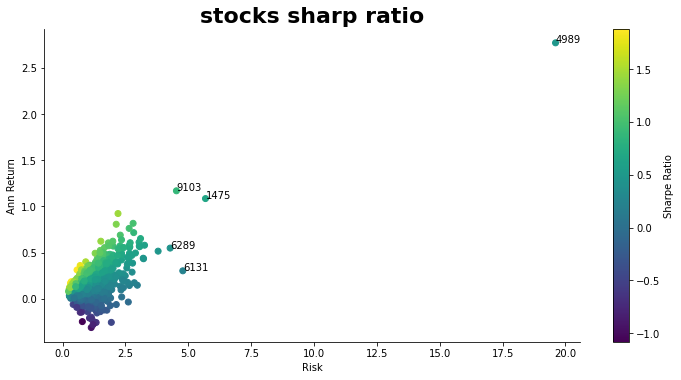

In [157]:
label_s = return_stock.columns.tolist()
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,6))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(x=x,y=y,
                c=sharp,
                marker = 'o')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('stocks sharp ratio', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Ann Return')
fig.colorbar(ax0,ax=ax, label = 'Sharpe Ratio')

for i in range(len(x)) :
  if y[i] > 0.3 and x[i] > 4:
    plt.annotate(label_s[i], (x[i], y[i]))


plt.savefig('Efficient_Frontier.png',dpi=300)





In [66]:
cov = return_industry.cov()*12
exp_return = return_industry.mean()*12

In [67]:
exp_return.sort_values(ascending=False)

航運業         0.342357
造紙工業        0.324772
半導體業        0.319057
鋼鐵工業        0.315662
電器電纜        0.285469
電子零組件業      0.261394
光電業         0.223023
資訊服務業       0.182546
玻璃陶瓷        0.177389
電子通路業       0.170233
其他電子業       0.169787
塑膠工業        0.166099
水泥工業        0.166019
電腦及週邊設備業    0.160064
紡織纖維        0.155854
建材營造業       0.155762
通信網路業       0.152601
橡膠工業        0.151748
金融保險業       0.141048
食品工業        0.135047
電機機械        0.132594
化學工業        0.128997
其他業         0.124085
油電燃氣業       0.109274
生技醫療業       0.099701
觀光事業        0.096484
貿易百貨業       0.093178
汽車工業        0.085022
dtype: float64

視覺化 covariance matrix

In [73]:
(cov.style
      .format('{:.4f}')
    #  .set_caption('')
    #  .hide_index()
    #  .bar('Age', vmin=0)
    #  .highlight_max('Survived')
     .background_gradient('Greens', 
                          )
    #  .highlight_null()
     .applymap(lambda x: 'background-color : red' if x > 0.05  else ('background-color : yellow' if x < 0 else ''))
)

,水泥工業,食品工業,塑膠工業,建材營造業,汽車工業,紡織纖維,其他業,貿易百貨業,電子零組件業,電機機械,生技醫療業,電器電纜,化學工業,玻璃陶瓷,造紙工業,鋼鐵工業,橡膠工業,航運業,電腦及週邊設備業,半導體業,其他電子業,通信網路業,光電業,電子通路業,資訊服務業,油電燃氣業,觀光事業,金融保險業
水泥工業,0.0318,0.0183,0.0318,0.0223,0.0235,0.0248,0.0169,0.0172,0.0255,0.0206,0.0174,0.0380,0.0193,0.0465,0.0395,0.0363,0.0251,0.0321,0.0223,0.0274,0.0213,0.0259,0.0294,0.0177,0.0148,0.0081,0.0205,0.0170
食品工業,0.0183,0.0153,0.0219,0.0144,0.0168,0.0172,0.0120,0.0113,0.0189,0.0150,0.0124,0.0256,0.0143,0.0300,0.0279,0.0244,0.0175,0.0241,0.0164,0.0213,0.0150,0.0187,0.0213,0.0129,0.0108,0.0059,0.0128,0.0116
塑膠工業,0.0318,0.0219,0.0456,0.0268,0.0300,0.0327,0.0227,0.0219,0.0339,0.0275,0.0247,0.0469,0.0262,0.0559,0.0543,0.0450,0.0312,0.0460,0.0282,0.0354,0.0272,0.0334,0.0376,0.0214,0.0186,0.0120,0.0274,0.0209
建材營造業,0.0223,0.0144,0.0268,0.0239,0.0231,0.0218,0.0169,0.0150,0.0254,0.0194,0.0204,0.0306,0.0174,0.0367,0.0297,0.0259,0.0212,0.0245,0.0199,0.0272,0.0206,0.0259,0.0273,0.0166,0.0153,0.0084,0.0203,0.0153
汽車工業,0.0235,0.0168,0.0300,0.0231,0.0356,0.0246,0.0208,0.0179,0.0346,0.0261,0.0220,0.0329,0.0214,0.0398,0.0389,0.0273,0.0248,0.0318,0.0271,0.0374,0.0273,0.0356,0.0365,0.0202,0.0186,0.0094,0.0253,0.0165
紡織纖維,0.0248,0.0172,0.0327,0.0218,0.0246,0.0357,0.0193,0.0193,0.0269,0.0216,0.0248,0.0379,0.0213,0.0467,0.0403,0.0368,0.0244,0.0371,0.0235,0.0298,0.0223,0.0274,0.0301,0.0171,0.0170,0.0095,0.0190,0.0186
其他業,0.0169,0.0120,0.0227,0.0169,0.0208,0.0193,0.0157,0.0127,0.0221,0.0181,0.0180,0.0241,0.0157,0.0288,0.0267,0.0204,0.0176,0.0237,0.0180,0.0236,0.0186,0.0225,0.0242,0.0135,0.0124,0.0069,0.0180,0.0127
貿易百貨業,0.0172,0.0113,0.0219,0.0150,0.0179,0.0193,0.0127,0.0181,0.0200,0.0152,0.0155,0.0239,0.0139,0.0310,0.0319,0.0266,0.0172,0.0335,0.0158,0.0219,0.0152,0.0194,0.0215,0.0118,0.0101,0.0064,0.0162,0.0117
電子零組件業,0.0255,0.0189,0.0339,0.0254,0.0346,0.0269,0.0221,0.0200,0.0463,0.0287,0.0252,0.0358,0.0230,0.0416,0.0413,0.0275,0.0261,0.0298,0.0304,0.0464,0.0314,0.0403,0.0438,0.0234,0.0196,0.0095,0.0279,0.0185
電機機械,0.0206,0.0150,0.0275,0.0194,0.0261,0.0216,0.0181,0.0152,0.0287,0.0256,0.0193,0.0297,0.0199,0.0341,0.0353,0.0255,0.0207,0.0294,0.0226,0.0315,0.0237,0.0282,0.0317,0.0166,0.0145,0.0080,0.0220,0.0152


heatmap , 處理中文化問題

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 39135 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21697 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_a

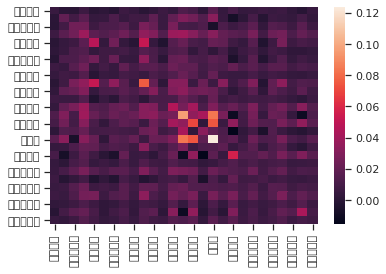

In [93]:
import seaborn as sn

# plt.figure(figsize=(50, 30))
#daily return
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sn.set(context='notebook', style='ticks', rc=rc)
sn.heatmap(cov , fmt='g')
plt.show()

報酬率

In [74]:
return_industry_t = return_industry[['航運業','造紙工業','半導體業','鋼鐵工業']]
return_industry_t

,航運業,造紙工業,半導體業,鋼鐵工業
2016-07-29,0.017389,0.033015,0.055799,0.045199
2016-08-31,-0.015626,0.010710,0.016096,0.030115
2016-09-30,0.015196,-0.002050,0.009615,0.006976
2016-10-31,-0.026268,0.059176,-0.013848,0.023908
2016-11-30,0.043355,0.037561,-0.001322,0.085924
2016-12-30,-0.036566,0.036368,0.014983,-0.014741
2017-01-24,0.046815,0.243962,0.030696,0.032147
2017-02-24,0.088140,0.091737,0.098723,0.091296
2017-03-31,-0.027363,-0.041511,0.051481,-0.006273
2017-04-28,-0.041125,-0.053511,0.001008,-0.046508


In [75]:
industry_expected_return =  return_industry_t.mean()*12
covariance_matrix = return_industry_t.cov()*12

stocks_weights = np.array([.25, .25, .25, .25])
portfolio_return = sum(stocks_weights * industry_expected_return)
portfolio_risk = np.sqrt(reduce(np.dot, [stocks_weights, covariance_matrix, stocks_weights.T]))
print('投資組合預期報酬率為: '+ str(round(portfolio_return,4)))
print('投資組合風險為: ' + str(round(portfolio_risk,4)))

投資組合預期報酬率為: 0.3255
投資組合風險為: 0.2548


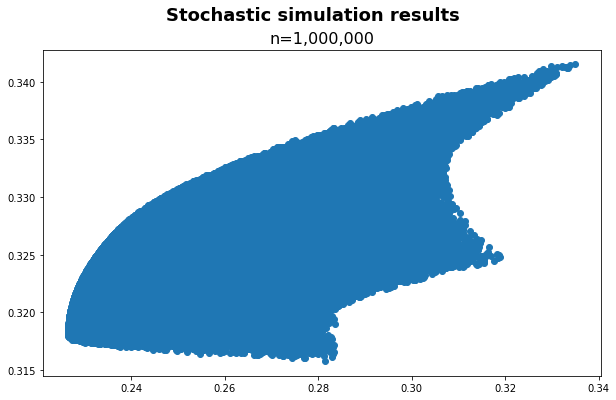

In [76]:
risk_list = []
return_list = []
industry = len(return_industry_t.columns)
stop = 0

while stop < 1000000:
    try:
        stop += 1
        weight = np.random.rand(industry)
        weight = weight / sum(weight)
        return_list.append(sum(industry_expected_return * weight))
        risk_list.append(np.sqrt(reduce(np.dot, [weight, covariance_matrix, weight.T])))
    except:
        pass

fig = plt.figure(figsize = (10,6))
fig.suptitle('Stochastic simulation results', fontsize=18, fontweight='bold')
ax = fig.add_subplot()
ax.plot(risk_list, return_list, 'o')
ax.set_title('n=1,000,000', fontsize=16)
fig.savefig('result.png',dpi=300)

In [78]:
def standard_deviation(weights):
    return np.sqrt(reduce(np.dot, [weights, covariance_matrix, weights.T]))

In [79]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(industry))
constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1}]
minimize_variance = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
mvp_risk = minimize_variance.fun
mvp_return = sum(minimize_variance.x * industry_expected_return)

print('風險最小化投資組合預期報酬率為:' + str(round(mvp_return,2)))
print('風險最小化投資組合風險為:' + str(round(mvp_risk,2)))

風險最小化投資組合預期報酬率為:0.32
風險最小化投資組合風險為:0.23


In [82]:
for i in range(industry):
    print(str(return_industry_t.columns[i])+' % of portfolio : ' + str(format(minimize_variance.x[i], '.4f')))


航運業 % of portfolio : 0.0135
造紙工業 % of portfolio : 0.0000
半導體業 % of portfolio : 0.6530
鋼鐵工業 % of portfolio : 0.3335


In [87]:
x0 = stocks_weights
bounds = tuple((0, 1) for x in range(industry))

efficient_fronter_return_range = np.arange(0.315, 0.340, .0025)
efficient_fronter_risk_list = []

for i in efficient_fronter_return_range:
    constraints = [{'type': 'eq', 'fun': lambda x: sum(x) - 1},
                   {'type': 'eq', 'fun': lambda x: sum(x * industry_expected_return) - i}]
    efficient_fronter = solver.minimize(standard_deviation, x0=x0, constraints=constraints, bounds=bounds)
    efficient_fronter_risk_list.append(efficient_fronter.fun)

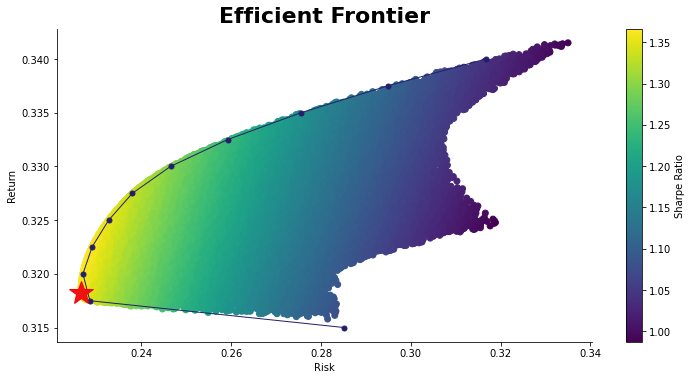

In [88]:
risk_free = 0.01

fig = plt.figure(figsize = (12,6))
fig.subplots_adjust(top=0.85)
ax = fig.add_subplot()

fig.subplots_adjust(top=0.85)
ax0 = ax.scatter(risk_list, return_list,
                c=(np.array(return_list)-risk_free)/np.array(risk_list),
                marker = 'o')
ax.plot(efficient_fronter_risk_list, efficient_fronter_return_range, linewidth=1, color='#251f6b', marker='o',
         markerfacecolor='#251f6b', markersize=5)
ax.plot(mvp_risk, mvp_return,'*',color='r', markerfacecolor='#ed1313',  markersize=25)


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Efficient Frontier', fontsize=22, fontweight='bold')
ax.set_xlabel('Risk')
ax.set_ylabel('Return')
fig.colorbar(ax0, ax=ax, label = 'Sharpe Ratio')
plt.savefig('Efficient_Frontier.png',dpi=300)

In [ ]:
!wget "https://drive.google.com/uc?export=download&id=1p9H8-iQsr8H3GYObC6wLbC7MkZpL7u4G" -O twse.csv

In [ ]:
df_tw = pd.read_csv('twse.csv',index_col=0,parse_dates=True, thousands= ' ')

In [ ]:
# beta = cov(stock,m)/ var(m)

for i in df.columns:
  if i != 'Price' :
    df_1 = df[[i,'Price']]
    return_t = df_1.pct_change()[1:]
    x = return_t.cov()['Price'].iloc[0]/return_t.cov()['Price'].iloc[1]
    type(x)
    print('beta of %s' % (i))
    print(x)


In [ ]:
#https://stackoverflow.com/questions/50417234/pandas-get-data-for-the-end-day-of-month
#https://ycy-tw.github.io/2020/03/28/Python-%E7%B9%AA%E8%A3%BD%E6%95%88%E7%8E%87%E5%89%8D%E7%B7%A3(Efficient%20Frontier)/
#https://www.cnblogs.com/traditional/p/11967360.html
#https://aronhack.com/zh/retrieve-stock-historical-data-with-python-and-yahoo-finance-api/